# More occuring fragments in COCONUT dataset in comparison to ZINC dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

### Making feature pointwise mutual information profiles

In [2]:
profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
profile.df

value
feature1                                           feature2                                                 
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            15582
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]         11
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                    139
                                                   [CH3][CH2][CH2][CH2]                                 7133
                                                   [CH3][CH2][CH2][CH2][CH2]                            6905
...                                                                                                      ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                      1

[18368174 rows x 1 columns]

In [3]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile)
probability_profile.df

value
feature1                                           feature2                                                    
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            0.040337
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]      0.000028
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                  0.000360
                                                   [CH3][CH2][CH2][CH2]                                0.018465
                                                   [CH3][CH2][CH2][CH2][CH2]                           0.017875
...                                                                                                         ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                  0.000003

[18368174 rows x 1 columns]

In [4]:
reference_profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
reference_profile.df

value
feature1                           feature2                                
[CH2][CH2][CH2][CH2][CH2]          [CH2][CH2][CH2][CH2][CH2]          20003
                                   [CH2][CH2][S][c]([n])[n]             143
                                   [C][CH2][CH2][CH2][CH2]             3587
                                   [cH][cH][cH][cH][cH]                2802
                                   [cH][cH][cH][cH][c]                 4376
...                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]      1
                                   [C][CH]([CH2])[NH][CH2][S]             1
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]             1
                                   [C][CH]([NH])[CH2][CH2][S]             1
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]             1

[13960003 rows x 1 columns]

In [5]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile)
reference_probability_profile.df

value
feature1                           feature2                                   
[CH2][CH2][CH2][CH2][CH2]          [CH2][CH2][CH2][CH2][CH2]          0.052777
                                   [CH2][CH2][S][c]([n])[n]           0.000377
                                   [C][CH2][CH2][CH2][CH2]            0.009464
                                   [cH][cH][cH][cH][cH]               0.007393
                                   [cH][cH][cH][cH][c]                0.011546
...                                                                        ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]  0.000003
                                   [C][CH]([CH2])[NH][CH2][S]         0.000003
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]         0.000003
                                   [C][CH]([NH])[CH2][CH2][S]         0.000003
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]         0.000003

[13960003 rows x 1 columns]

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [6]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.847558
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.431965
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              5.091474
                                   [CH3][CH2][CH2][CH2]                            4.187864
                                   [CH3][CH2][CH2][CH2][CH2]                       4.440557
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027471
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027471
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027471
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027471
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027471

[30685450 rows x 1 columns]

### More occuring fragments in COCONUT dataset than in ZINC dataset

In [7]:
difference_pkld_profile.df.nlargest(50,"value")

value
feature1                                           feature2                                                     
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([CH])[C](=[O])[O][CH]                     11.962995
[CH2][CH]([O])[CH2][O][P]                          [CH]=[CH][CH2][CH2][CH2]                            11.586323
                                                   [CH][CH2][CH2][CH2][CH2]                            11.583097
[CH][O][CH2][CH]([CH])[OH]                         [C]=[CH][CH2][CH]([C])[C]                           11.531910
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C][CH2][CH2][CH]([C])[C]                           11.517015
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O]                           11.490694
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [C][C](=[O])[O][CH]([CH])[CH]                       11.402989
[CH][CH]([OH])[CH]([OH])[CH2][O]                   [C]=[CH][CH2][CH]([C])[C]                           11.358395
[C]=[CH][CH2][CH]([C])[C]                          [C][C](=[O])[O][CH]([CH])[O]                        11.336668
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.309043
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.286554
[CH][CH]([O])[CH2][OH]                             [CH][O][CH]([CH3])[CH]([CH])[O]                     11.280872
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C]=[CH][CH2][CH]([C])[C]                           11.268880
[CH3][CH]([CH])[O][CH]([CH])[O]                    [C]=[CH][CH2][CH]([C])[C]                           11.242248
[CH][O][CH]([CH2][OH])[CH]([CH])[OH]               [CH][O][CH]([CH3])[CH]([CH])[O]                     11.192307
[CH][CH2][CH]=[C]([CH])[C]                         [CH][CH2][O][CH]([CH])[O]                           11.183813
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][O][CH2][CH]([CH])[OH]                          11.177715
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.157408
[CH2][CH]([C])[O][CH]([CH])[O]                     [CH][O][CH]([O][CH2])[CH]([CH])[OH]                 11.123550
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([O])[O]                11.117828
[C][c]([c])[cH][cH][c]                             [c][CH]=[C]([O][c])[C]([c])=[O]                     11.117510
[c][CH]([CH])[O][c]([c])[c]                        [c][CH]([CH])[O][c]([c])[c]                         11.100527
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [CH]=[C]([O])[C](=[O])[c]([cH])[c]                  11.064629
                                                   [C][c]([c])[cH][cH][c]                              11.036602
[CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]       [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.012138
[CH][CH2][CH2][C]([CH])([CH3])[CH]                 [CH][O][CH]([CH3])[CH]([CH])[OH]                    11.008020
[CH][CH]([OH])[CH]([OH])[CH]([CH2])[OH]            [C]=[CH][CH2][CH]([C])[C]                           11.003893
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([CH])[OH]              11.003890
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH]([OH])[CH]([OH])[CH2][O]                    10.992819
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [C][C](=[O])[O][CH]([CH])[CH]                       10.985860
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH]=[C]([CH])[C]                          10.969010
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]        10.967594
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH3][CH]([CH])[O][CH]([CH])[O]                     10.961222
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [c][CH]=[C]([O][c])[C]([c])=[O]                     10.959797
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C

### Most occuring combinations of fragments in COCONUT dataset in comparision to ZINC

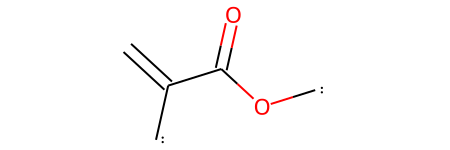

In [11]:
Chem.MolFromSmiles('[CH2]=[C]([CH])[C](=[O])[O][CH]')

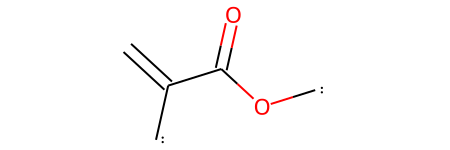

In [9]:
Chem.MolFromSmiles('[CH2]=[C]([CH])[C](=[O])[O][CH]')

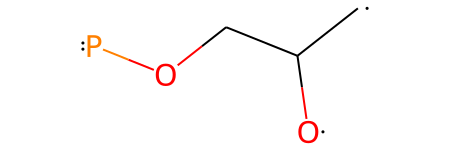

In [12]:
Chem.MolFromSmiles('[CH2][CH]([O])[CH2][O][P]')

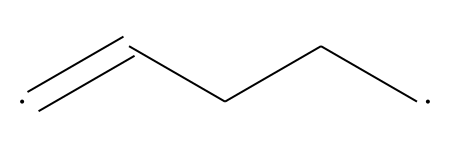

In [13]:
Chem.MolFromSmiles('[CH]=[CH][CH2][CH2][CH2]')

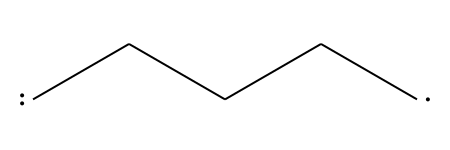

In [14]:
Chem.MolFromSmiles('[CH][CH2][CH2][CH2][CH2]')

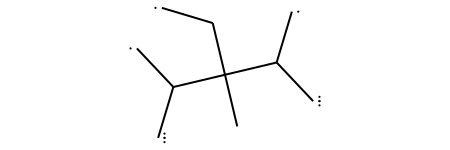

In [15]:
Chem.MolFromSmiles('[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C]')

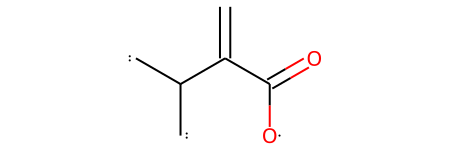

In [16]:
Chem.MolFromSmiles('[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]')

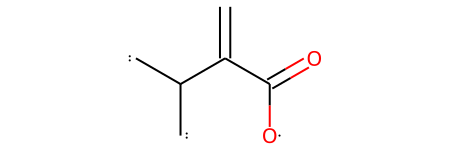

In [17]:
Chem.MolFromSmiles('[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]')